<a href="https://colab.research.google.com/github/Parhy/Birds/blob/main/Clasificaci%C3%B3n_de_aves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clasificación de especies de aves usando redes neuronales convolucionales <a name="proyAves"></a>

**Autores: Santiago Angulo Flórez, Jean Carlos Portilla Mora**

<img src="https://raw.githubusercontent.com/Parhy/Birds/master/BannerIA2.png" style="width:700px;">

**Objetivo: Clasificar entre distintas especies de aves.**

- Dataset: Bird Species.
- Modelo: MobileNet, Resnet, autoencoders.

[(Video)](https://youtu.be) 
[(Dataset)](https://www.kaggle.com/gpiosenka/100-bird-species) 
[(+info)](https://github.com/Parhy/Birds)

In [ ]:
#@title MONTAR EL DRIVE  (If you are in in colab){ display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/course-IA2/ai-2-uis-student')
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/course-IA2/ai-2-uis-student


In [ ]:
#@title Load libraries { display-mode: "form" }

import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn import datasets
import tensorflow as tf
from google.colab import files
print(tf.__version__)

2.4.1


### Descarga de Imagenes 

In [ ]:
# Instalamos nuestros componentes mágicos de kaggle
!pip install  -q kaggle

In [ ]:
# Subimos el archivo de nuestras creedenciales de kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"santiagoangulo","key":"d778bc960f0ecf182de8173c5e0bbdd0"}'}

In [ ]:
#! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
# Las líneas de arriba y estas se resumen en qué damos autroización de almacenamiento.

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Descargamos el dataset de células
! kaggle datasets download -d gpiosenka/100-bird-species

100% 1.54G/1.54G [00:19<00:00, 113MB/s]
100% 1.54G/1.54G [00:19<00:00, 84.6MB/s]


In [ ]:
#Descomprimir, solo se hace una vez.
! unzip 100-bird-species.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: train/TEAL DUCK/112.jpg  
  inflating: train/TEAL DUCK/113.jpg  
  inflating: train/TEAL DUCK/114.jpg  
  inflating: train/TEAL DUCK/115.jpg  
  inflating: train/TEAL DUCK/116.jpg  
  inflating: train/TEAL DUCK/117.jpg  
  inflating: train/TEAL DUCK/118.jpg  
  inflating: train/TEAL DUCK/119.jpg  
  inflating: train/TEAL DUCK/120.jpg  
  inflating: train/TEAL DUCK/121.jpg  
  inflating: train/TEAL DUCK/122.jpg  
  inflating: train/TEAL DUCK/123.jpg  
  inflating: train/TEAL DUCK/124.jpg  
  inflating: train/TEAL DUCK/125.jpg  
  inflating: train/TEAL DUCK/126.jpg  
  inflating: train/TEAL DUCK/127.jpg  
  inflating: train/TEAL DUCK/128.jpg  
  inflating: train/TEAL DUCK/129.jpg  
  inflating: train/TEAL DUCK/130.jpg  
  inflating: train/TEAL DUCK/131.jpg  
  inflating: train/TEAL DUCK/132.jpg  
  inflating: train/TEAL DUCK/133.jpg  
  inflating: train/TEAL DUCK/134.jpg  
  inflating: train/TEAL DUCK/135.jpg  
  i

[Acceso a Kaggle desde colab](https://www.kaggle.com/general/74235)

### Tratamiento de los datos

In [ ]:
dir = "/content/drive/My Drive/course-IA2/ai-2-uis-student/birds/" #solo cambia esto y gg

In [ ]:
clases = os.listdir(dir)
num_clases = len(clases)
num_clases

239

In [ ]:
input_shape = (224, 224, 3)
datos_entrenamiento = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.2,
                                   rescale=1./255.,
                                   rotation_range=15,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.15,
                                   zoom_range=0.5,
                                  )

entrenados = datos_entrenamiento.flow_from_directory(directory=dir,
                                    class_mode='categorical',
                                    target_size=input_shape[0:2],
                                    batch_size=64,
                                    subset="training",
                                    classes=clases,
                                    shuffle=False
                                    )

validados = datos_entrenamiento.flow_from_directory(directory=dir,
                                  class_mode='categorical',
                                  target_size=input_shape[0:2],
                                  batch_size=64,
                                  subset="validation",
                                  classes=clases,
                                  shuffle=False
                                  )

pasos_entrenamiento = entrenados.n // 64
pasos_validacion = validados.n // 64
print("Batches: ", pasos_entrenamiento, "and", pasos_validacion)

Found 28948 images belonging to 239 classes.
Found 7120 images belonging to 239 classes.
Batches:  452 and 111


In [ ]:
dir2= "/content/drive/My Drive/course-IA2/ai-2-uis-student/birds/"
entrenados2 = tf.keras.preprocessing.image_dataset_from_directory(directory=dir2,
                                                                
                                    image_size=(224,224),
                                    batch_size=64,
                                    subset="training",
                                    shuffle=True,
                                    seed=123,
                                    validation_split=0.2
                                    )

Found 36068 files belonging to 239 classes.
Using 28855 files for training.


In [ ]:
nombre_clases = entrenados2.class_names
print(nombre_clases)

['AFRICAN CROWNED CRANE', 'AFRICAN FIREFINCH', 'ALEXANDRINE PARAKEET', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN REDSTART', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ARARIPE MANAKIN', 'ASIAN CRESTED IBIS', 'BANANAQUIT', 'BANDED BROADBILL', 'BAR-TAILED GODWIT', 'BARN OWL', 'BARN SWALLOW', 'BARRED PUFFBIRD', 'BAY-BREASTED WARBLER', 'BEARDED BARBET', 'BELTED KINGFISHER', 'BIRD OF PARADISE', 'BLACK FRANCOLIN', 'BLACK SKIMMER', 'BLACK SWAN', 'BLACK THROATED WARBLER', 'BLACK VULTURE', 'BLACK-CAPPED CHICKADEE', 'BLACK-NECKED GREBE', 'BLACK-THROATED SPARROW', 'BLACKBURNIAM WARBLER', 'BLUE GROUSE', 'BOBOLINK', 'BROWN NOODY', 'BROWN THRASHER', 'CACTUS WREN', 'CALIFORNIA GULL', 'CAPE MAY WARBLER', 'CAPUCHINBIRD', 'CARMINE BEE-EATER', 'CASPIAN TERN', 'CASSOWARY', 'CHARA DE COLLAR', 'CHIPPING SPARROW', 'CHUKAR PARTRIDGE', 'COCK OF THE  ROCK', 'COCKATOO', 'COMMON FIRECREST', 'COMMON GRACKLE', 'COMMON HOUSE MARTIN', 'COMMON LOON', 'COMMON POORW

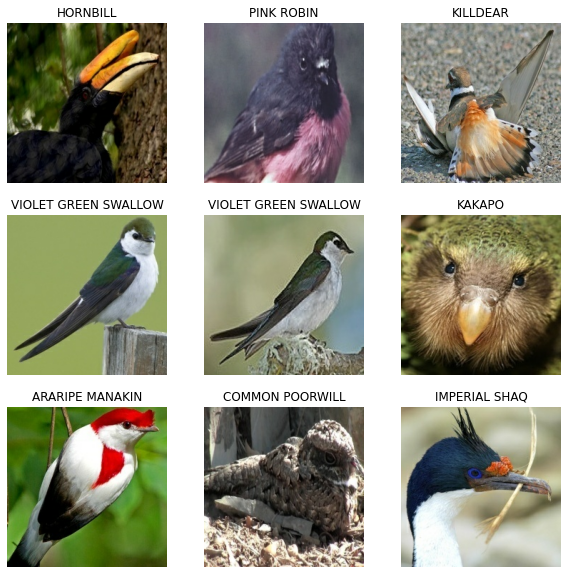

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in entrenados2.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(nombre_clases[labels[i]])
    plt.axis("off")

### Red CNN - MobileNetV2

In [ ]:
model_CNN = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
model_CNN.trainable = False
model_CNN.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D() 
prediction_layer = tf.keras.layers.Dense(num_clases, activation='softmax')

model_CNN_2 = tf.keras.Sequential([
  model_CNN,
  global_average_layer,
  prediction_layer
])

In [ ]:
model_CNN_2.summary()
print("number of layers to train: ", len(model_CNN_2.trainable_variables))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 239)               306159    
Total params: 2,564,143
Trainable params: 306,159
Non-trainable params: 2,257,984
_________________________________________________________________
number of layers to train:  2


In [ ]:
opt = tf.keras.optimizers.Adam(lr=0.001)
model_CNN_2.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', 
                           patience=2, 
                           mode='auto',
                           restore_best_weights=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', 
                              factor=0.1, 
                              patience=2, 
                              verbose=1, 
                              mode='auto')

In [ ]:
 history =  model_CNN_2.fit_generator(generator=entrenados, 
                        steps_per_epoch=pasos_entrenamiento,
                        validation_data=validados,
                        validation_steps=pasos_validacion,
                        epochs=10,
                        callbacks=[early_stop, reduce_lr]
                        )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
452/452 [==============================] - 416s 916ms/step - loss: 7.5793 - accuracy: 0.0146 - val_loss: 3.8182 - val_accuracy: 0.1695
Epoch 2/10
452/452 [==============================] - 409s 906ms/step - loss: 3.8307 - accuracy: 0.1551 - val_loss: 3.1893 - val_accuracy: 0.2513
Epoch 3/10
452/452 [==============================] - 408s 904ms/step - loss: 2.9640 - accuracy: 0.2925 - val_loss: 2.5291 - val_accuracy: 0.3830
Epoch 4/10
452/452 [==============================] - 408s 903ms/step - loss: 2.4279 - accuracy: 0.3968 - val_loss: 2.0363 - val_accuracy: 0.4965
Epoch 5/10
452/452 [==============================] - 408s 903ms/step - loss: 2.0307 - accuracy: 0.4940 - val_loss: 1.8184 - val_accuracy: 0.5490
Epoch 6/10
452/452 [==============================] - 408s 902ms/step - loss: 1.8928 - accuracy: 0.5244 - val_loss: 1.7956 - val_accuracy: 0.5597
Epoch 7/10
452/452 [==============================] - 408s 902ms/step - loss: 1.7852 - accuracy: 0.5446 - val_loss: 1.6695 -

#### Análisis de Resultados - Precisión

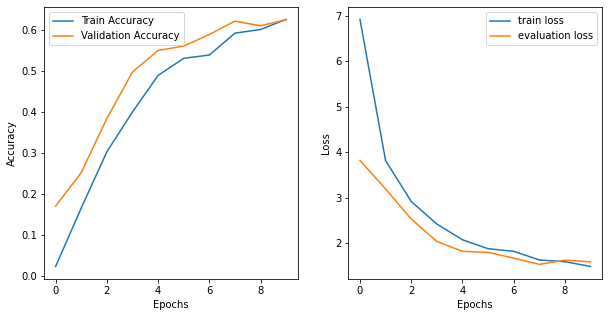

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
!mkdir -p modelos
model_CNN_2.save('modelos/mobilenetnoShu.h5')

In [ ]:
ls modelos

mobilenet.h5  mobilenetnoShu.h5  resnet10ep.h5  resnet30ep.h5


#### Análisis de Resultados - Matriz de confusión

In [ ]:
pip install scikit-plot

In [ ]:
import numpy as np
model_CNN_2 = 
predictions = model_CNN_2.predict_generator(validados,steps=11)
predictions
predicted_classes = np.argmax(predictions, axis=1)
predicted_classes


In [ ]:
true_classes = validados.classes
class_labels = list(validados.class_indices.keys())   
true_classes

In [ ]:
print(len(predicted_classes),len(true_classes))

7120 7120


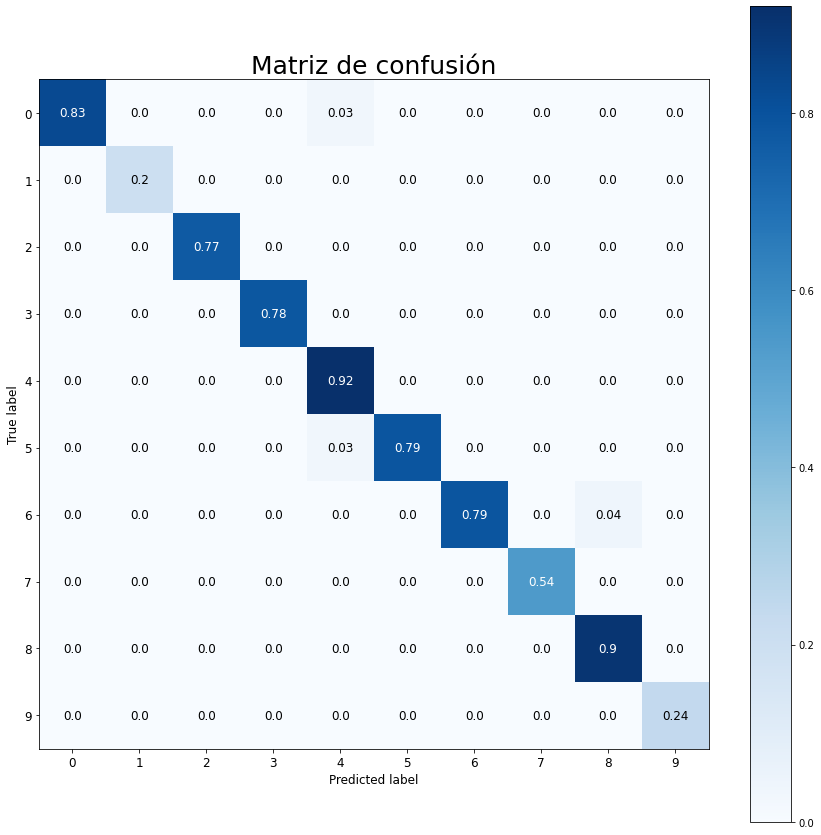

In [ ]:
import scikitplot as skplt
muestra = [0,1,2,3,4,5,6,7,8,9]
skplt.metrics.plot_confusion_matrix(true_classes, predicted_classes, normalize=True,figsize=(15,15),title="Matriz de confusión",title_fontsize=25,text_fontsize="large",pred_labels=muestra,true_labels=muestra)
plt.show()

#### Análisis de Resultados - Curva ROC

In [ ]:
proba = modelnoshu2.predict_proba(validados,batch_size=64)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [ ]:
proba.shape

(7120, 239)

In [ ]:
true_classes

array([  0,   0,   0, ..., 238, 238, 238], dtype=int32)

In [ ]:
print(len(true_classes),type(true_classes))

7120 <class 'numpy.ndarray'>


In [ ]:
true_classes.shape

(7120,)

In [ ]:
type(proba_classes)

numpy.int64

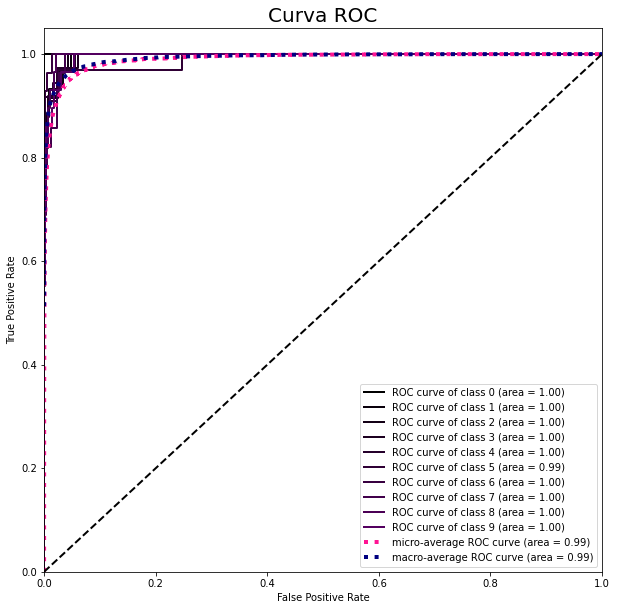

In [ ]:
skplt.metrics.plot_roc(true_classes, proba, figsize=(10,10),title="Curva ROC",title_fontsize=20,classes_to_plot=[0,1,2,3,4,5,6,7,8,9])
plt.show()

#### Mejorando nuestro acc

In [ ]:
modelnoshu2 = tf.keras.models.load_model('modelos/mobilenetnoShu.h5')

In [ ]:
modelnoshu2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 239)               306159    
Total params: 2,564,143
Trainable params: 306,159
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
 history =  modelnoshu2.fit_generator(generator=entrenados, 
                        steps_per_epoch=pasos_entrenamiento,
                        validation_data=validados,
                        validation_steps=pasos_validacion,
                        epochs=4,
                        callbacks=[early_stop, reduce_lr]
                        )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/4
452/452 [==============================] - 8400s 19s/step - loss: 1.2242 - accuracy: 0.6906 - val_loss: 1.3449 - val_accuracy: 0.6788
Epoch 2/4
452/452 [==============================] - 411s 910ms/step - loss: 1.1659 - accuracy: 0.7024 - val_loss: 1.2330 - val_accuracy: 0.7010
Epoch 3/4
452/452 [==============================] - 410s 907ms/step - loss: 1.2094 - accuracy: 0.6957 - val_loss: 1.4528 - val_accuracy: 0.6626
Epoch 4/4
452/452 [==============================] - 408s 903ms/step - loss: 1.1293 - accuracy: 0.7161 - val_loss: 1.4666 - val_accuracy: 0.6734

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.


In [ ]:
modelnoshu2.save('modelos/mobilenetnoShu2.h5')

In [ ]:
modelnoshu2 = tf.keras.models.load_model('modelos/mobilenetnoShu2.h5')

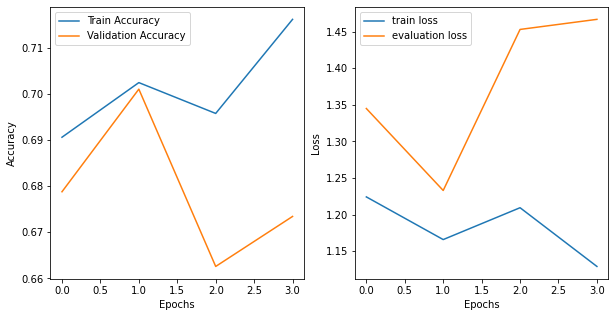

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
import numpy as np
predictions = modelnoshu2.predict_generator(validados,steps=112)
predictions
predicted_classes = np.argmax(predictions, axis=1)
predicted_classes

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


array([  0, 101,   0, ..., 238, 238, 238])

In [ ]:
true_classes = validados.classes
class_labels = list(validados.class_indices.keys())   
true_classes

array([  0,   0,   0, ..., 238, 238, 238], dtype=int32)

In [ ]:
print(len(predicted_classes),len(true_classes))

7120 7120


In [ ]:
#@title **code:**  Muestra de aves
ave1=0#@param {type:"integer"}
ave2=3#@param {type:"integer"}
ave3=5#@param {type:"integer"}
ave4=6#@param {type:"integer"}
ave5=8#@param {type:"integer"}
ave6=52#@param {type:"integer"}
ave7=66#@param {type:"integer"}
ave8=81#@param {type:"integer"}
ave9=94#@param {type:"integer"}

In [ ]:
muestra_ave = [class_labels[ave1],
             class_labels[ave2],
             class_labels[ave3],
             class_labels[ave4],
             class_labels[ave5],
             class_labels[ave6],
             class_labels[ave7],
             class_labels[ave8],
             class_labels[ave9]]

In [ ]:
muestra_ave

['AFRICAN CROWNED CRANE',
 'AMERICAN AVOCET',
 'AMERICAN COOT',
 'AMERICAN GOLDFINCH',
 'AMERICAN REDSTART',
 'COMMON POORWILL',
 'EASTERN MEADOWLARK',
 'GILA WOODPECKER',
 'GREAT POTOO']

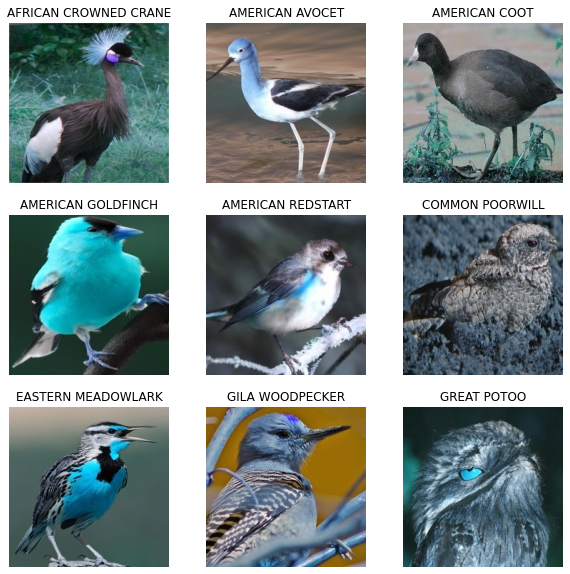

In [ ]:
import cv2
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  image = '/content/drive/My Drive/course-IA2/ai-2-uis-student/birds/'+muestra_ave[i]+'/003.jpg'
  plt.imshow(cv2.imread(image))
  plt.title(muestra_ave[i])
  plt.axis("off")

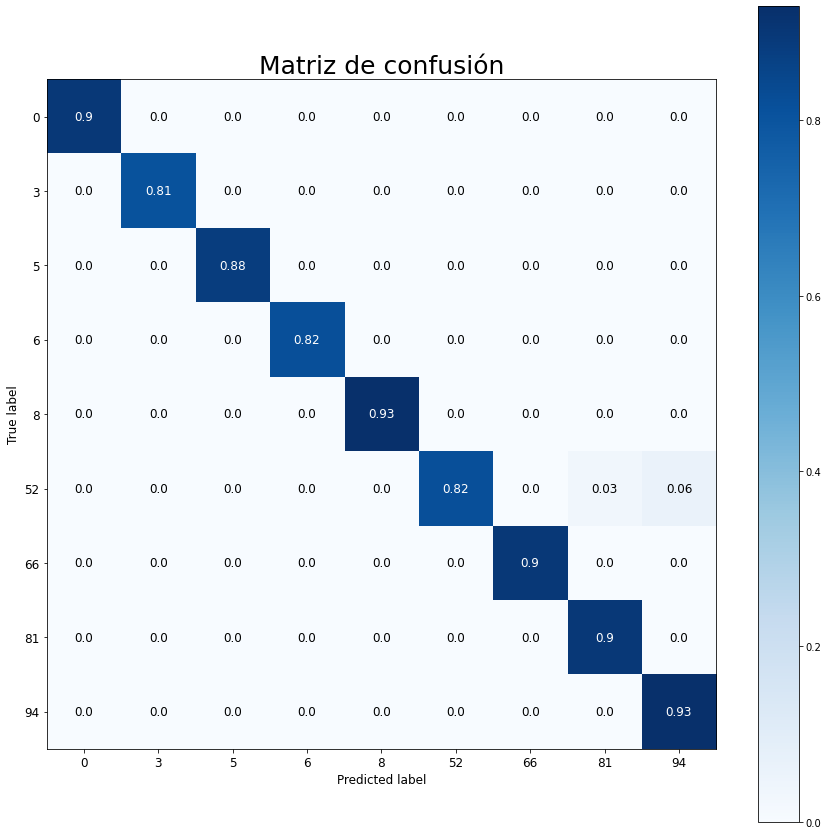

In [ ]:
import scikitplot as skplt
muestra = [ave1,ave2,ave3,ave4,ave5,ave6,ave7,ave8,ave9]
skplt.metrics.plot_confusion_matrix(true_classes, predicted_classes, normalize=True,figsize=(15,15),title="Matriz de confusión",title_fontsize=25,text_fontsize="large",pred_labels=muestra,true_labels=muestra)
plt.show()

In [ ]:
proba = modelnoshu2.predict_proba(validados,batch_size=64)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [ ]:
proba.shape

(7120, 239)

In [ ]:
true_classes

array([  0,   0,   0, ..., 238, 238, 238], dtype=int32)

In [ ]:
print(len(true_classes),type(true_classes))

7120 <class 'numpy.ndarray'>


In [ ]:
true_classes.shape

(7120,)

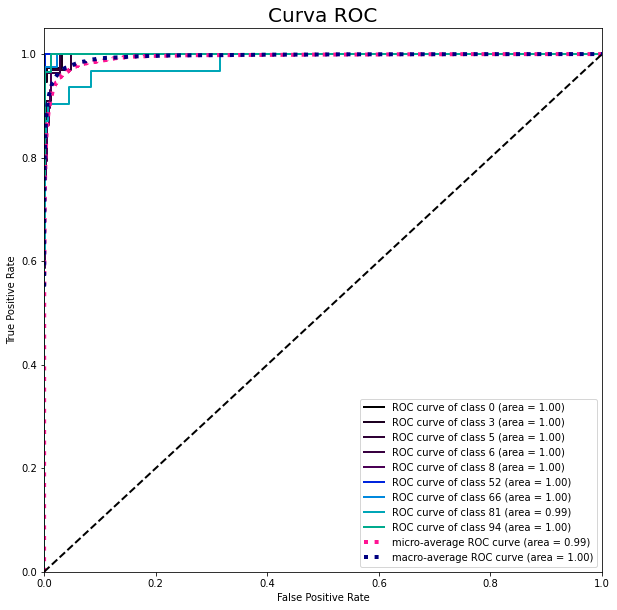

In [ ]:
skplt.metrics.plot_roc(true_classes, proba, figsize=(10,10),title="Curva ROC",title_fontsize=20,classes_to_plot=muestra)
plt.show()

#### Identificación de grupos

Reiichiro Nakano. (2018). reiinakano/scikit-plot: 0.3.7 [Data set]. Zenodo. https://github.com/reiinakano/scikit-plot

### Red CNN - ResNet

In [ ]:
model_CNN = tf.keras.applications.ResNet101(weights='imagenet', include_top=False, input_shape=(224,224,3))
model_CNN.trainable = False
model_CNN.summary()

Model: "resnet101"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
__________________________________________________________________________________________

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D() 
prediction_layer = tf.keras.layers.Dense(num_clases, activation='softmax')

model_CNN_2 = tf.keras.Sequential([
  model_CNN,
  global_average_layer,
  prediction_layer
])

In [ ]:
opt = tf.keras.optimizers.Adam(lr=0.001)
model_CNN_2.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model_CNN_2.summary()
print("number of layers to train: ", len(model_CNN_2.trainable_variables))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet101 (Functional)       (None, 7, 7, 2048)        42658176  
_________________________________________________________________
global_average_pooling2d_3 ( (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 11)                22539     
Total params: 42,680,715
Trainable params: 22,539
Non-trainable params: 42,658,176
_________________________________________________________________
number of layers to train:  2


In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', 
                           patience=5, 
                           mode='max',
                           restore_best_weights=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', 
                              factor=0.1, 
                              patience=5, 
                              verbose=1, 
                              mode='max')

In [ ]:
 history =  model_CNN_2.fit_generator(generator=entrenados, 
                        steps_per_epoch=pasos_entrenamiento,
                        validation_data=validados,
                        validation_steps=pasos_validacion,
                        epochs=10,
                        callbacks=[early_stop, reduce_lr]
                        )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
20/20 [==============================] - 29s 1s/step - loss: 2.4790 - accuracy: 0.0896 - val_loss: 2.3948 - val_accuracy: 0.1000
Epoch 2/10
20/20 [==============================] - 21s 1s/step - loss: 2.3818 - accuracy: 0.1456 - val_loss: 2.3722 - val_accuracy: 0.1531
Epoch 3/10
20/20 [==============================] - 22s 1s/step - loss: 2.3689 - accuracy: 0.1713 - val_loss: 2.3675 - val_accuracy: 0.1219
Epoch 4/10
20/20 [==============================] - 22s 1s/step - loss: 2.3580 - accuracy: 0.1818 - val_loss: 2.3538 - val_accuracy: 0.1719
Epoch 5/10
20/20 [==============================] - 22s 1s/step - loss: 2.3299 - accuracy: 0.1660 - val_loss: 2.3411 - val_accuracy: 0.1719
Epoch 6/10
20/20 [==============================] - 21s 1s/step - loss: 2.3330 - accuracy: 0.1865 - val_loss: 2.3409 - val_accuracy: 0.1937
Epoch 7/10
20/20 [==============================] - 21s 1s/step - loss: 2.3222 - accuracy: 0.1816 - val_loss: 2.3318 - val_accuracy: 0.2000
Epoch 8/10
20/20 [==

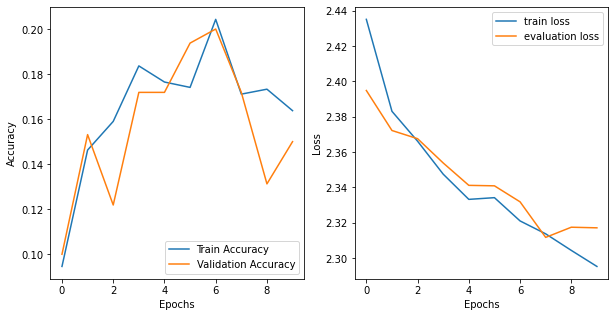

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
!mkdir -p modelos
model_CNN_2.save('modelos/resnet10ep.h5')

In [ ]:
ls modelos

resnet10ep.h5  resnet30ep.h5


In [ ]:
modeload = tf.keras.models.load_model('modelos/resnet10ep.h5')

In [ ]:
modeload.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet101 (Functional)       (None, 7, 7, 2048)        42658176  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 11)                22539     
Total params: 42,680,715
Trainable params: 22,539
Non-trainable params: 42,658,176
_________________________________________________________________


In [ ]:
 history =  modeload.fit_generator(generator=entrenados, 
                        steps_per_epoch=pasos_entrenamiento,
                        validation_data=validados,
                        validation_steps=pasos_validacion,
                        epochs=20,
                        callbacks=[early_stop, reduce_lr]
                        )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
20/20 [==============================] - 27s 1s/step - loss: 2.2935 - accuracy: 0.2027 - val_loss: 2.3119 - val_accuracy: 0.1813
Epoch 2/20
20/20 [==============================] - 21s 1s/step - loss: 2.2699 - accuracy: 0.2234 - val_loss: 2.3040 - val_accuracy: 0.1875
Epoch 3/20
20/20 [==============================] - 21s 1s/step - loss: 2.2657 - accuracy: 0.2305 - val_loss: 2.2856 - val_accuracy: 0.1937
Epoch 4/20
20/20 [==============================] - 21s 1s/step - loss: 2.2509 - accuracy: 0.2258 - val_loss: 2.2824 - val_accuracy: 0.1688
Epoch 5/20
20/20 [==============================] - 21s 1s/step - loss: 2.2559 - accuracy: 0.2202 - val_loss: 2.2805 - val_accuracy: 0.1875
Epoch 6/20
20/20 [==============================] - 21s 1s/step - loss: 2.2453 - accuracy: 0.2313 - val_loss: 2.2760 - val_accuracy: 0.1969
Epoch 7/20
20/20 [==============================] - 21s 1s/step - loss: 2.2309 - accuracy: 0.2353 - val_loss: 2.2622 - val_accuracy: 0.2031
Epoch 8/20
20/20 [==

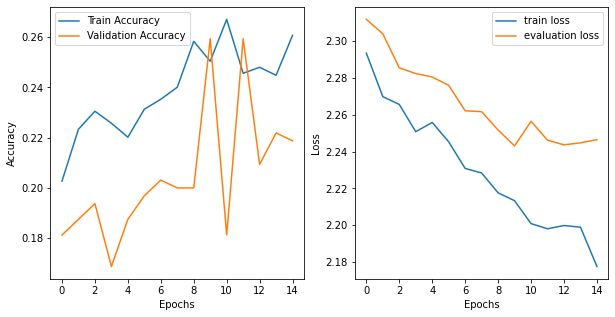

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
modeload.save('modelos/resnet30ep.h5')

In [ ]:
modeload2 = tf.keras.models.load_model('modelos/resnet30ep.h5')

In [ ]:
 history =  modeload2.fit_generator(generator=entrenados, 
                        steps_per_epoch=pasos_entrenamiento,
                        validation_data=validados,
                        validation_steps=pasos_validacion,
                        epochs=20,
                        callbacks=[early_stop, reduce_lr]
                        )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
20/20 [==============================] - 26s 1s/step - loss: 2.2029 - accuracy: 0.2695 - val_loss: 2.2405 - val_accuracy: 0.2344
Epoch 2/20
20/20 [==============================] - 21s 1s/step - loss: 2.1951 - accuracy: 0.2647 - val_loss: 2.2542 - val_accuracy: 0.2438
Epoch 3/20
20/20 [==============================] - 21s 1s/step - loss: 2.1993 - accuracy: 0.2750 - val_loss: 2.2541 - val_accuracy: 0.2000
Epoch 4/20
20/20 [==============================] - 21s 1s/step - loss: 2.1927 - accuracy: 0.2647 - val_loss: 2.2313 - val_accuracy: 0.2688
Epoch 5/20
20/20 [==============================] - 21s 1s/step - loss: 2.2059 - accuracy: 0.2560 - val_loss: 2.2424 - val_accuracy: 0.2125
Epoch 6/20
20/20 [==============================] - 21s 1s/step - loss: 2.1856 - accuracy: 0.2782 - val_loss: 2.2505 - val_accuracy: 0.2156
Epoch 7/20
20/20 [==============================] - 21s 1s/step - loss: 2.1947 - accuracy: 0.2798 - val_loss: 2.2445 - val_accuracy: 0.2219
Epoch 8/20
20/20 [==

### Autoencoders

In [ ]:
# Próximamente.... 

### Conclusiones 


*   Elemento de lista
*   Elemento de lista
*   Elemento de lista
*   Elemento de lista

